# Bike Buyers

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url ="C:\\Users\\Thingbaijam Celina\\Downloads\\bikebuyer1 (1).csv"
data = pd.read_csv(url)
data.head()

,id,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,BikeBuyer
0,22711,Single,Male,30000.0,0,Partial College,Clerical,No,1,0-1 Miles,Europe,33,Yes
1,13555,Married,Female,40000.0,0,Graduate Degree,Clerical,Yes,0,0-1 Miles,Europe,37,Yes
2,28907,NaN,Male,160000.0,5,Partial College,Professional,No,3,10+ Miles,Europe,55,No
3,25410,NaN,Female,70000.0,2,Bachelors,Skilled Manual,No,1,0-1 Miles,North America,38,Yes
4,15756,Single,Female,70000.0,0,High School,Professional,Yes,2,5-10 Miles,Pacific,49,Yes


In [3]:
data.isna().sum()

id                  0
Marital Status      4
Gender              0
Yearly Income       3
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
BikeBuyer           0
dtype: int64

In [4]:
data["Marital Status"].fillna("Married",inplace = True)
data.head()

,id,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,BikeBuyer
0,22711,Single,Male,30000.0,0,Partial College,Clerical,No,1,0-1 Miles,Europe,33,Yes
1,13555,Married,Female,40000.0,0,Graduate Degree,Clerical,Yes,0,0-1 Miles,Europe,37,Yes
2,28907,Married,Male,160000.0,5,Partial College,Professional,No,3,10+ Miles,Europe,55,No
3,25410,Married,Female,70000.0,2,Bachelors,Skilled Manual,No,1,0-1 Miles,North America,38,Yes
4,15756,Single,Female,70000.0,0,High School,Professional,Yes,2,5-10 Miles,Pacific,49,Yes


In [5]:
data = data.drop(["id"],axis= 1)

In [6]:
data = data.values

In [7]:
data

array([['Single', 'Male', 30000.0, ..., 'Europe', 33, 'Yes'],
       ['Married', 'Female', 40000.0, ..., 'Europe', 37, 'Yes'],
       ['Married', 'Male', 160000.0, ..., 'Europe', 55, 'No'],
       ...,
       ['Married', 'Male', 50000.0, ..., 'North America', 32, 'No'],
       ['Single', 'Male', 50000.0, ..., 'North America', 32, 'No'],
       ['Married', 'Female', 50000.0, ..., 'North America', 32, 'No']],
      dtype=object)

In [8]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = "mean",verbose = 0)
si.fit(data[:,2:3])
data[:,2:3] = si.fit_transform(data[:,2:3])
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Single,Male,30000.0,0,Partial College,Clerical,No,1,0-1 Miles,Europe,33,Yes
1,Married,Female,40000.0,0,Graduate Degree,Clerical,Yes,0,0-1 Miles,Europe,37,Yes
2,Married,Male,160000.0,5,Partial College,Professional,No,3,10+ Miles,Europe,55,No
3,Married,Female,70000.0,2,Bachelors,Skilled Manual,No,1,0-1 Miles,North America,38,Yes
4,Single,Female,70000.0,0,High School,Professional,Yes,2,5-10 Miles,Pacific,49,Yes


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[0] = le.fit_transform(data[0])
data[1] =le.fit_transform(data[1])
data[4] =le.fit_transform(data[4])
data[5] = le.fit_transform(data[5])
data[6] = le.fit_transform(data[6])
data[8] = le.fit_transform(data[8])
data[9] = le.fit_transform(data[9])
data[11] = le.fit_transform(data[11])

data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
9993,0,0,40000.0,0,3,4,1,1,4,1,29,0
9994,1,0,40000.0,0,3,4,0,1,1,1,30,0
9995,0,1,50000.0,0,3,4,1,1,4,1,32,0
9996,1,1,50000.0,0,3,4,1,1,4,1,32,0
9997,0,0,50000.0,0,3,4,1,1,4,1,32,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9998 non-null   int32 
 1   1       9998 non-null   int32 
 2   2       9998 non-null   object
 3   3       9998 non-null   object
 4   4       9998 non-null   int32 
 5   5       9998 non-null   int32 
 6   6       9998 non-null   int32 
 7   7       9998 non-null   object
 8   8       9998 non-null   int32 
 9   9       9998 non-null   int32 
 10  10      9998 non-null   object
 11  11      9998 non-null   int32 
dtypes: int32(8), object(4)
memory usage: 625.0+ KB


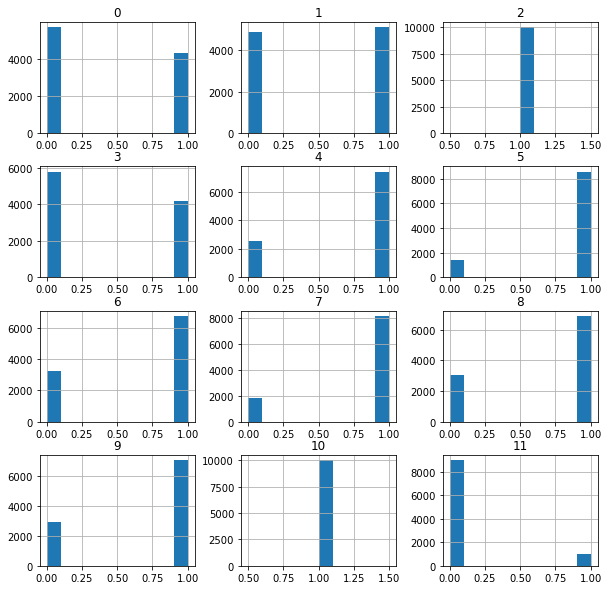

In [28]:
data.hist(figsize =(10,10))
plt.show()

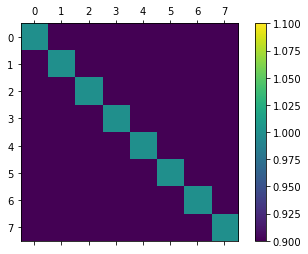

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(),vmin = 1,vmax = 1)
fig.colorbar(cax)
plt.show()

In [13]:
from sklearn.preprocessing import Binarizer
scaler = Binarizer(threshold =0.0).fit(data)
data = scaler.transform(data)
np.set_printoptions(precision = 3)
print(data[:4,:])

[[1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.]]


In [14]:
data = pd.DataFrame(data)

In [15]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

array = data.values
x = array[:,:-1]
y = array[:,-1]
test_size = 0.33
seed=8
scoring = 'accuracy'

models = []
models.append(("LR",LogisticRegression()))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("svm",SVC()))
models.append(("NB",GaussianNB()))
results = []
names = []

for name,model in models:
    kfold = model_selection.ShuffleSplit(n_splits =10,test_size = test_size ,random_state = seed)
    cv_results = model_selection.cross_val_score(model,x,y,cv = kfold,scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean()*100,cv_results.std())
    print(msg)

LR: 89.918182 (0.002126)
LDA: 89.918182 (0.002126)
CART: 89.987879 (0.002152)
KNN: 89.006061 (0.005936)
svm: 89.918182 (0.002252)
NB: 89.263636 (0.005080)


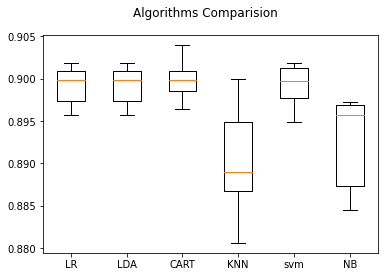

In [16]:
fig = plt.figure()
fig.suptitle("Algorithms Comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(("ScaledLR",Pipeline([("bina",StandardScaler()),("LR",LogisticRegression())])))
pipelines.append(("ScaledLDA",Pipeline([("bina",StandardScaler()),("LDA",LinearDiscriminantAnalysis())])))
pipelines.append(("ScaledKNN",Pipeline([("bina",StandardScaler()),("KNN",KNeighborsClassifier())])))
pipelines.append(("ScaledCART",Pipeline([("bina",StandardScaler()),("CART",DecisionTreeClassifier())])))
pipelines.append(("ScaledNB",Pipeline([("bina",StandardScaler()),("NB",GaussianNB())])))
pipelines.append(("ScaledSVM",Pipeline([("bina",StandardScaler()),("svm",SVC())])))
results = []
names = []

for name,model in pipelines:
    kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size ,random_state = seed)
    cv_results = model_selection.cross_val_score(model,x,y,cv = kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean()*100,cv_results.std())
    print(msg)

ScaledLR: 89.918182 (0.002126)
ScaledLDA: 89.918182 (0.002126)
ScaledKNN: 89.051515 (0.006230)
ScaledCART: 89.978788 (0.002156)
ScaledNB: 89.263636 (0.005080)
ScaledSVM: 89.990909 (0.002402)


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

scaler = Binarizer().fit(x)
rescaledX = scaler.transform(x)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors = neighbors)
scoring = 'accuracy'
model = KNeighborsClassifier()
kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size ,random_state = seed)
grid = GridSearchCV(estimator = model ,param_grid = param_grid ,cv = kfold,scoring = scoring)
grid_result = grid.fit(rescaledX,y)
print("Best: %f using %s" % (grid_result.best_score_*100,grid_result.best_params_))

Best: 89.903030 using {'n_neighbors': 21}


In [19]:
scaler = Binarizer().fit(x) 
rescaledX = scaler.transform(x)
c_values = [0.1,0.3,0.5,0.6,0.7,0.9,1.1,1.3,1.6,1.9]
kernel_values = ["linear",'poly','rbf','Sigmoid']
param_grid = dict(C = c_values ,kernel = kernel_values)
model = SVC()
scoring = 'accuracy'
kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size ,random_state = seed)
grid = GridSearchCV(estimator = model ,param_grid = param_grid ,scoring = scoring)
grid_result = grid.fit(rescaledX,y)
print("Best : %f using %s" % (grid_result.best_score_,grid_result.best_params_))

C:\Users\Thingbaijam Celina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Thingbaijam Celina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Thingbaijam Celina\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Thingbaijam Celina\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit


Best : 0.901380 using {'C': 1.6, 'kernel': 'poly'}


In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

ensembles = []
ensembles.append(("AD",AdaBoostClassifier()))
ensembles.append(("GBM",GradientBoostingClassifier()))
ensembles.append(("RF",RandomForestClassifier()))
ensembles.append(("ET",ExtraTreesClassifier()))

results = []
names = []
scoring = 'accuracy'
for name,model in ensembles:
    kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size ,random_state = seed)
    cv_results = model_selection.cross_val_score(model,x,y,cv = kfold,scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

AD: 0.899182 (0.002126)
GBM: 0.899061 (0.002253)
RF: 0.899212 (0.002268)
ET: 0.899848 (0.001942)


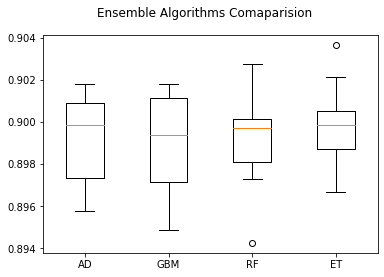

In [21]:
fig = plt.figure()
fig.suptitle("Ensemble Algorithms Comaparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
scaler = Binarizer(threshold = 0.0).fit(x)
rescaledX = scaler.transform(x)
model = SVC(kernel = "poly")
model.fit(rescaledX,y)

SVC(kernel='poly')

In [23]:
rescaledValidationX = scaler.transform(x)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y,predictions))

0.9013802760552111


In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,predictions))

[[8988   10]
 [ 976   24]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y,predictions))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      8998
         1.0       0.71      0.02      0.05      1000

    accuracy                           0.90      9998
   macro avg       0.80      0.51      0.50      9998
weighted avg       0.88      0.90      0.86      9998

